<a href="https://colab.research.google.com/github/DPonirakis/Colab/blob/main/NorthAtlanticSeaSurfaceTemperatureAnomalyFrom_1982_2023_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


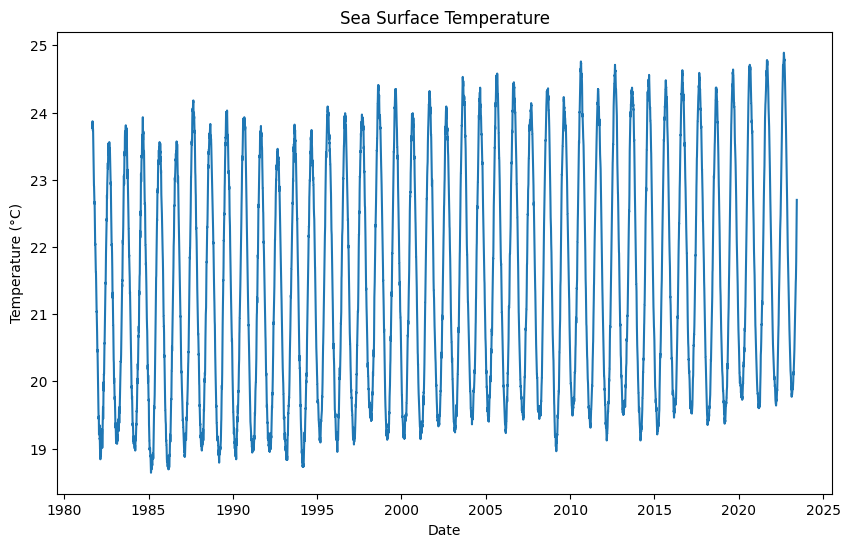

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the data
url = "https://climatereanalyzer.org/clim/sst_daily/json/oisst2.1_natlan1_sst_day.json"
response = requests.get(url)
data = response.json()

# Prepare the data for plotting
plot_data = []
for year_data in data:
    year = year_data['name']
    # Skip the entries for the "1982-2011 mean", "plus 2σ", and "minus 2σ"
    if year in ['1982-2011 mean', 'plus 2σ', 'minus 2σ']:
        continue
    for day, temp in enumerate(year_data['data'], start=1):
        if temp is not None:  # Exclude None values
            plot_data.append({'date': pd.to_datetime(f'{year}/{day}', format='%Y/%j'), 'temp': temp})

# Convert the data to a pandas DataFrame
df = pd.DataFrame(plot_data)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temp'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Sea Surface Temperature')
plt.show()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


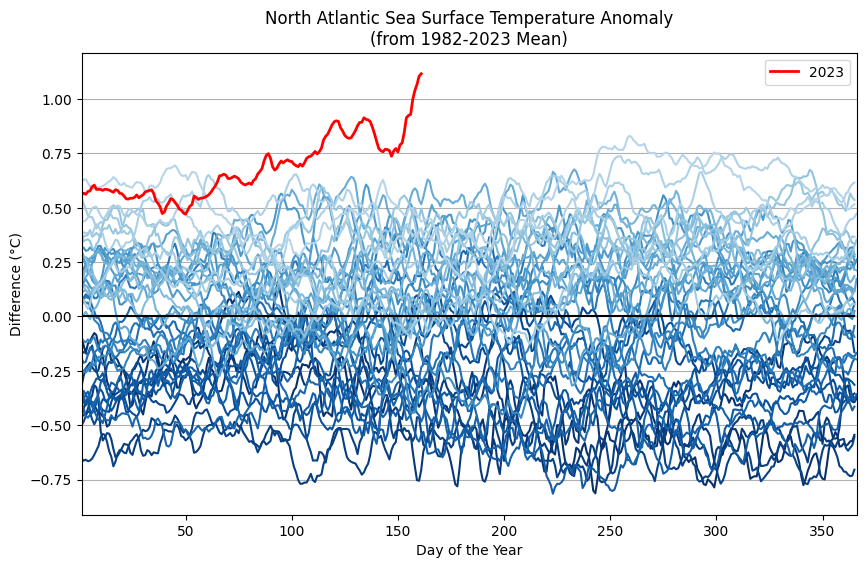

In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch the data
url = "https://climatereanalyzer.org/clim/sst_daily/json/oisst2.1_natlan1_sst_day.json"
response = requests.get(url)
data = response.json()

# Prepare the data for plotting
plot_data = []
for year_data in data:
    year = year_data['name']
    # Skip the entries for the "1982-2011 mean", "plus 2σ", and "minus 2σ"
    if year in ['1982-2011 mean', 'plus 2σ', 'minus 2σ']:
        continue
    for day, temp in enumerate(year_data['data'], start=1):
        if temp is not None:  # Exclude None values
            plot_data.append({'year': int(year), 'day': day, 'temp': temp})

# Convert the data to a pandas DataFrame
df = pd.DataFrame(plot_data)

# Calculate the mean and standard deviation for each day of the year over the period 1982-2023
mean = df[df['year'] < 2023].groupby('day')['temp'].mean()
std = df[df['year'] < 2023].groupby('day')['temp'].std()

# Calculate the difference from the mean for each year
df['diff'] = df.apply(lambda row: row['temp'] - mean[row['day']], axis=1)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot each year in shades of blue, with the color getting darker each year
colors = plt.cm.Blues(np.linspace(1, 0.3, 2023 - 1982))
for year in range(1982, 2023):
    plt.plot(df[df['year'] == year]['day'], df[df['year'] == year]['diff'], color=colors[year - 1982], label='_nolegend_')

# Plot the year 2023 in red with a thicker line
plt.plot(df[df['year'] == 2023]['day'], df[df['year'] == 2023]['diff'], color='red', linewidth=2, label='2023')

# Add a legend
plt.legend()

# Plot the 1982-2023 mean line (all zero) in black
plt.plot(range(1, 366), [0]*365, color='black', label='1982-2023 mean')

# Plot the +/-2 SD and +/-4 SD lines in green
#plt.plot(range(1, 366), [2*std.get(i, np.nan) for i in range(1, 366)], color='green', linestyle='--', label='+/- 2 SD')
#plt.plot(range(1, 366), [-2*std.get(i, np.nan) for i in range(1, 366)], color='green', linestyle='--', label='_nolegend_')
#plt.plot(range(1, 366), [4*std.get(i, np.nan) for i in range(1, 366)], color='green', linestyle=':', label='+/- 4 SD')
#plt.plot(range(1, 366), [-4*std.get(i, np.nan) for i in range(1, 366)], color='green', linestyle=':', label='_nolegend_')

plt.xlabel('Day of the Year')
plt.ylabel('Difference (°C)')
plt.title('North Atlantic Sea Surface Temperature Anomaly\n(from 1982-2023 Mean)')

# Add horizontal grid lines
plt.grid(axis='y')

# Set x-axis limits to the extents of the data
plt.xlim([df['day'].min(), df['day'].max()])

from google.colab import drive
drive.mount('/content/gdrive')


# Save the figure to a .png file
plt.savefig('/content/gdrive/My Drive/NorthAtlanticSeaSurfaceTemperatureAnomalyFrom_1982-2023_Mean.png')

plt.show()